In [2]:
#A
import tensorflow as tf #to create and develop neural network and make it faster
from tensorflow import keras  #acts as an interface for tensorflow, and also used to create deep l models
import matplotlib.pyplot as plt  #graphical plotting library
import random  # used to make predictions on build model, it generates a random no. between given range

In [15]:
#B load training and testing dataset
mnist = tf.keras.datasets.mnist  #import mnist dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()  #splitting dataset into training and testing
x_train = x_train/255  #max range of grayscale image was from 0-255, we have converted it from 0-1 
x_test = x_test/255

In [16]:
# x_train=x_train[0]
# img_len, img_width = x_train.shape
# print('Size of img is: ',img_len, 'x', img_width)

In [17]:
#C Define the network architecture using keras
#Flatten - converts multi-dimensional array into flattened 1-D array
model = keras.Sequential([         # Sequential model is used cuz we have to make feed forw NN.....(28,28) is image shape
    keras.layers.Flatten(input_shape=(28,28)), #FNN needs data in vector form, therefore we use Flatten to convert our img data in vector form,(input layer)
    keras.layers.Dense(128, activation="relu"), #128 neurons in hidden layer given and relu function
    keras.layers.Dense(10, activation="softmax") #10 neurons for o/p layer and activation func is softmax
])
model.summary() #i.e. konse layer pe kya ho raha hai uski summary in table form

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
#D train the model using SGD(Stochastic Gradient Descent)
model.compile(optimizer="sgd",  #compile method is used for training,, sgd is our optimizer
             loss="sparse_categorical_crossentropy", #measures or similarity in training
             metrics=['accuracy'])   #judges the performance(accuracy) of our model

#jo bhi training and testing data hai usko fit karna hai humare model ke andar
history=model.fit(x_train,
y_train,validation_data=(x_test,y_test),epochs=10) #validate x_test and y_test,, epoch more--> accuracy is more

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6520 - accuracy: 0.8371 - val_loss: 0.3613 - val_accuracy: 0.9010
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3369 - accuracy: 0.9055 - val_loss: 0.2939 - val_accuracy: 0.9179
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2887 - accuracy: 0.9187 - val_loss: 0.2628 - val_accuracy: 0.9269
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2594 - accuracy: 0.9272 - val_loss: 0.2397 - val_accuracy: 0.9326
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2371 - accuracy: 0.9338 - val_loss: 0.2224 - val_accuracy: 0.9380
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2186 - accuracy: 0.9390 - val_loss: 0.2080 - val_accuracy: 0.9424
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2028 - accuracy: 0.9437 - val_loss: 0.1926 - val_ac

313/313 [==============================] - 1s 4ms/step - loss: 0.1640 - accuracy: 0.9524
Loss=0.164
Accuracy=0.952


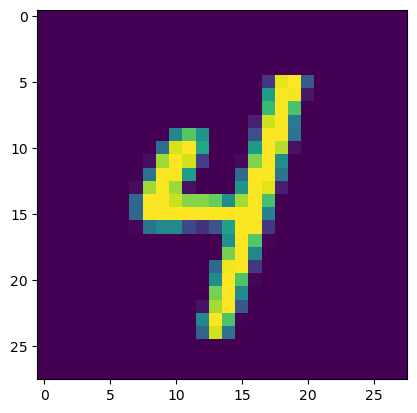

In [27]:
#E Evaluate the network -- to check our test loss and accuracy after testing
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)

n=random.randint(0,9999) #our dataset has 10k entries usmese random value generate karege and 
plt.imshow(x_test[n])    #display that random value
plt.show()               #to display the output

313/313 [==============================] - 1s 4ms/step
Predicted Value:  [2.01037074e-06 3.10396308e-06 4.22040694e-06 4.42654800e-06
 9.97993469e-01 1.03192426e-04 2.66602401e-05 4.51538035e-05
 1.32656205e-04 1.68512051e-03]


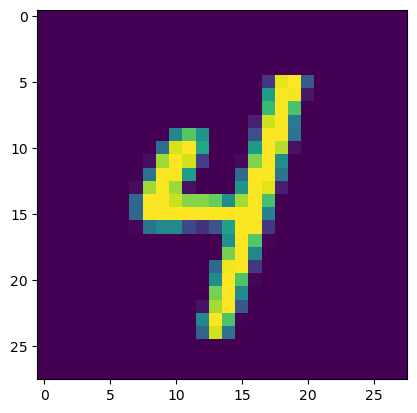

In [28]:
predicted_value=model.predict(x_test)  #predict the value
plt.imshow(x_test[n])
plt.show

print('Predicted Value: ', predicted_value[n])

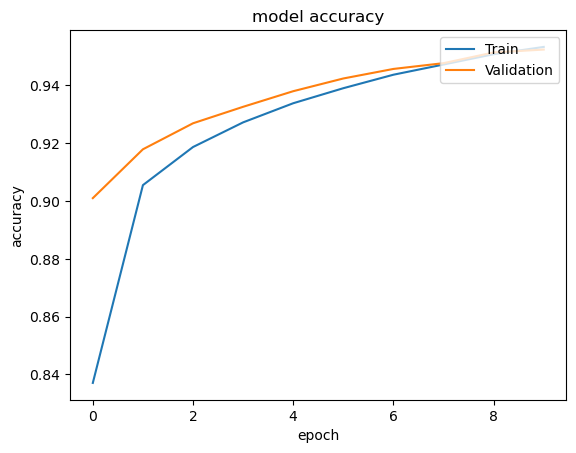

In [29]:
#Plot the training loss and accuracy

#plotting training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

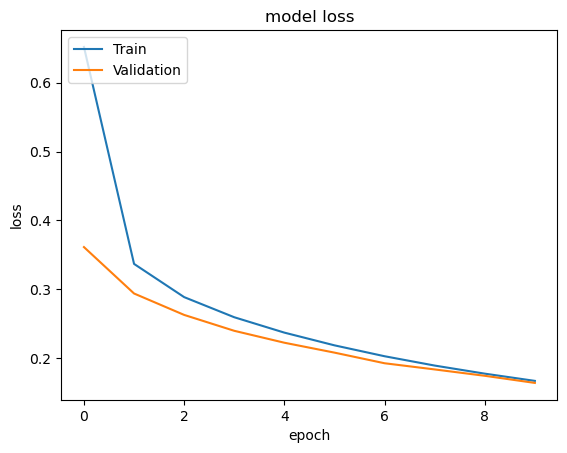

In [30]:
#plotting training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()